In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from datetime import datetime
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import warnings
warnings.filterwarnings("ignore")

In [2]:
GSPC=pd.read_csv('GSPC.csv',index_col='Date')
GSPC=GSPC.iloc[:,1:]
GSPC.index=pd.to_datetime(GSPC.index)
GSPC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09


In [3]:
Close=GSPC.Close
High=GSPC.High
Low=GSPC.Low
ndate=len(Close)

In [4]:
RSV=[]
for j in range(8,ndate):
    periodHigh=np.max(High[(j-8):(j+1)])
    periodLow=np.min(Low[(j-8):(j+1)])
    RSV.append(100*(Close[j]-periodLow)\
           /(periodHigh-periodLow))

In [5]:
RSV=pd.Series(RSV,index=Close.index[8:])
RSV.name='RSV'
RSV.head()
RSV.describe()

count    326.000000
mean      63.558226
std       31.525472
min        0.000000
25%       37.323359
50%       72.580422
75%       91.854801
max      100.000000
Name: RSV, dtype: float64

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

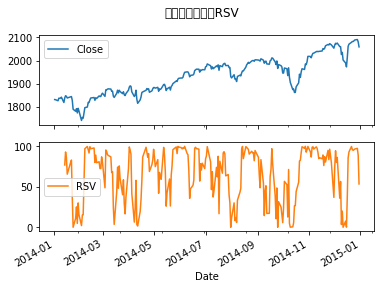

In [6]:
Close1=Close['2013':'2014']
RSV1=RSV['2013':'2014']
Cl_RSV=pd.DataFrame([Close1,RSV1]).transpose()
from matplotlib.font_manager import FontProperties
Cl_RSV.plot(subplots=True,
             title='未成熟隨機指標RSV')

In [7]:
GSPC2013_2014=GSPC['2013':'2014']

In [8]:
import candle 

c:\users\jiunjiun\appdata\local\programs\python\python37\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


2013-2014年標普500指數日K線圖


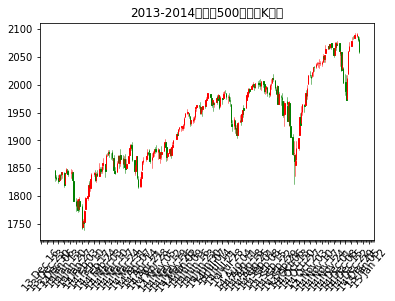

In [9]:
print("2013-2014年標普500指數日K線圖")
candle.candlePlot(GSPC2013_2014,'2013-2014年標普500指數日K線圖')
from matplotlib.font_manager import FontProperties

In [10]:
K=[50]
D=[50]

for i in range(len(RSV)):
    KValue = (2/3)*K[-1] + (RSV[i]/3)
    DValue = (2/3)*D[-1] + KValue/3
    K.append(KValue)
    D.append(DValue)

In [11]:
K=pd.Series(K[1:],index=RSV.index)
K.name='KValue'
K.head()

Date
2014-01-14    58.998036
2014-01-15    70.343759
2014-01-16    75.557638
2014-01-17    72.247907
2014-01-21    74.854656
Name: KValue, dtype: float64

In [12]:
D=pd.Series(D[1:],index=RSV.index)
D.name='DValue'
D.head()

Date
2014-01-14    52.999345
2014-01-15    58.780817
2014-01-16    64.373090
2014-01-17    66.998029
2014-01-21    69.616905
Name: DValue, dtype: float64

No handles with labels found to put in legend.


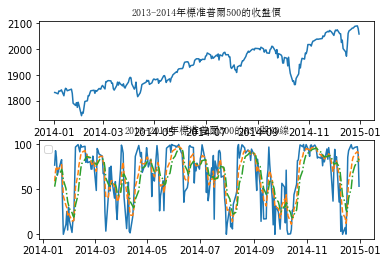

In [13]:
plt.subplot(211)
plt.title('2013-2014年標准普爾500的收盤價', fontproperties="SimSun")
plt.plot(Close['2013':'2014'])
plt.subplot(212)
plt.title('2013-2014年標准普爾500的RSV與KD線', fontproperties="SimSun")
plt.plot(RSV['2013':'2014'])
plt.plot(K['2013':'2014'],linestyle='dashed')
plt.plot(D['2013':'2014'],linestyle='-.')
plt.legend(loc='upper left')
from matplotlib.font_manager import FontProperties

In [14]:
J=3*K-2*D
J.name='JValue'
J.head()

Date
2014-01-14    70.995416
2014-01-15    93.469645
2014-01-16    97.926733
2014-01-17    82.747662
2014-01-21    85.330158
Name: JValue, dtype: float64

No handles with labels found to put in legend.


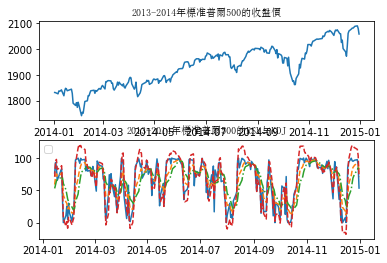

In [15]:
plt.subplot(211)
plt.title('2013-2014年標准普爾500的收盤價', fontproperties="SimSun")
plt.plot(Close['2013':'2014'])
plt.subplot(212)
plt.title('2013-2014年標准普爾500的RSV与KDJ', fontproperties="SimSun")
plt.plot(RSV['2013':'2014'])
plt.plot(K['2013':'2014'],linestyle='dashed')
plt.plot(D['2013':'2014'],linestyle='-.')
plt.plot(J['2013':'2014'],linestyle='--')
plt.legend(loc='upper left') 

In [16]:
KSignal=K.apply(lambda x:\
                    -1 if x>80 else 1 if x<20 else 0)

DSignal=D.apply(lambda x: \
                 -1 if x>80 else 1 if x<20 else 0)
KDSignal=KSignal+DSignal
KDSignal.name='KDSignal'

In [17]:
KDSignal[KDSignal>=1]=1
KDSignal[KDSignal<=-1]=-1
KDSignal.head(n=3)

Date
2014-01-14    0
2014-01-15    0
2014-01-16    0
Name: KDSignal, dtype: int64

In [18]:
KDSignal[KDSignal==1].head(n=3)

Date
2014-02-03    1
2014-02-04    1
2014-02-05    1
Name: KDSignal, dtype: int64

In [19]:
def trade(signal,price):
    ret=(price-price.shift(1))/price.shift(1)
    ret.name='ret'
    signal=signal.shift(1)
    tradeRet=(ret*signal).dropna()
    tradeRet.name='tradeRet'
    tradeRet[tradeRet==-0]=0
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),
                     left_index=True,\
                     right_index=True).dropna()
    return(Returns)

In [20]:
KDtrade=trade(KDSignal,Close)
KDtrade.rename(columns={'ret':'Ret',\
              'tradeRet':'KDtradeRet'},\
               inplace=True)
KDtrade.head()

,Ret,KDtradeRet
Date,,
2014-01-15,0.005166,0.0
2014-01-16,-0.001347,0.0
2014-01-17,-0.003895,0.0
2014-01-21,0.002774,0.0
2014-01-22,0.000575,0.0


In [21]:
import ffn

In [22]:
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],\
        index=['win rate','annualized return',\
        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    Trade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
           tradeRet.name:Trade}))

In [23]:
backtest(KDtrade.Ret,KDtrade.KDtradeRet)

,Ret,KDtradeRet
win rate,0.547692,0.516129
annualized return,0.099523,0.038129
sharpe ratio,0.055947,0.046189
maximum drawdown,-0.074015,-0.063772


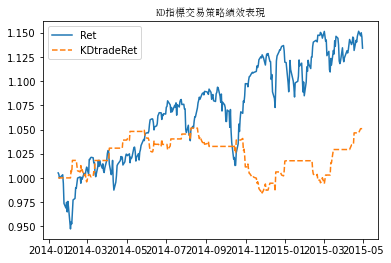

In [24]:
cumRets1=(1+KDtrade).cumprod()
plt.plot(cumRets1.Ret,label='Ret')
plt.plot(cumRets1.KDtradeRet,'--',\
          label='KDtradeRet')
plt.title('KD指標交易策略績效表現', fontproperties="SimSun")
plt.legend()
from matplotlib.font_manager import FontProperties

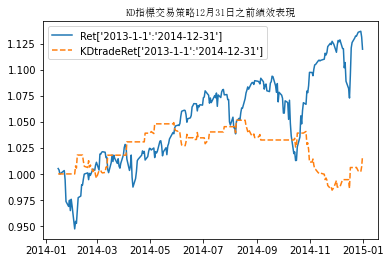

In [25]:
backtest(KDtrade.Ret['2013-1-1':'2014-12-31'],\
          KDtrade.KDtradeRet['2013-1-1':'2014-12-31'])

cumRets2=(1+KDtrade['2013-1-1':'2014-12-31']).cumprod()
plt.plot(cumRets2.Ret,\
          label='''Ret['2013-1-1':'2014-12-31']''')
plt.plot(cumRets2.KDtradeRet,'--',\
          label='''KDtradeRet['2013-1-1':'2014-12-31']''')
plt.title('KD指標交易策略12月31日之前績效表現', fontproperties="SimSun")
plt.legend(loc='upper left')
#plt.show()

In [26]:
JSignal=J.apply(lambda x:\
         -1 if x>100 else 1 if x<0 else 0)
KDJSignal=KSignal+DSignal+JSignal
KDJSignal=KDJSignal.apply(lambda x:\
          1 if x>=2 else -1 if x<=-2 else 0)

In [27]:
KDJtrade=trade(KDJSignal,Close)
KDJtrade.rename(columns={'ret':'Ret',\
             'tradeRet':'KDJtradeRet'},\
             inplace=True)

backtest(KDJtrade.Ret,KDJtrade.KDJtradeRet)

,Ret,KDJtradeRet
win rate,0.547692,0.519231
annualized return,0.099523,0.028956
sharpe ratio,0.055947,0.039300
maximum drawdown,-0.074015,-0.059033


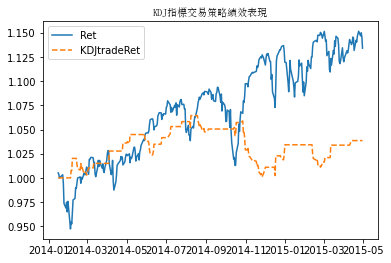

In [28]:
KDJCumRet=(1+KDJtrade).cumprod()
plt.plot(KDJCumRet.Ret,label='Ret')
plt.plot(KDJCumRet.KDJtradeRet,'--',\
          label='KDJtradeRet')
plt.title('KDJ指標交易策略績效表現', fontproperties="SimSun")
plt.legend(loc='upper left')

In [29]:
backtest(KDJtrade.Ret['2013-1-1':'2014-12-31'],\
             KDJtrade.KDJtradeRet['2013-1-1':'2014-12-31'])

,Ret,KDJtradeRet
win rate,0.576132,0.500000
annualized return,0.120691,0.034513
sharpe ratio,0.068388,0.043026
maximum drawdown,-0.074015,-0.059033


In [30]:
def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,\
                   Line.shift(1)<RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
                     index=Line.index[1:]))

In [31]:
KDupbreak=upbreak(K,D)*1
KDupbreak[KDupbreak==1].head()

Date
2014-02-06    1
2014-03-04    1
2014-03-20    1
2014-03-31    1
2014-04-16    1
dtype: int32

In [32]:
def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,\
                   Line.shift(1)>RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
           index=Line.index[1:]))

In [33]:
KDdownbreak=downbreak(K,D)*1
KDdownbreak[KDdownbreak==1].head()

Date
2014-01-23    1
2014-02-21    1
2014-03-11    1
2014-03-24    1
2014-04-07    1
dtype: int32

In [34]:
Close=Close['2013-1-1':'2014-12-31']
difClose=Close.diff()

prctrend=2*(difClose[1:]>=0)-1
prctrend.head()

Date
2014-01-03   -1
2014-01-06   -1
2014-01-07    1
2014-01-08   -1
2014-01-09    1
Name: Close, dtype: int32

In [35]:
KDupSig=(KDupbreak[1:]+prctrend)==2
KDupSig.head(n=3)

Date
2014-01-03    False
2014-01-06    False
2014-01-07    False
dtype: bool

In [36]:
KDdownSig= (KDdownbreak[1:]==1)&(prctrend==-1) 

breakSig=KDupSig*1+KDdownSig*-1
breakSig.name='breakSig'
breakSig.head()

Date
2014-01-03    0
2014-01-06    0
2014-01-07    0
2014-01-08    0
2014-01-09    0
Name: breakSig, dtype: int32

In [37]:
KDbreak=trade(breakSig,Close)
KDbreak.rename(columns={'ret':'Ret',\
              'tradeRet':'KDbreakRet'},\
              inplace=True)
KDbreak.head()

,Ret,KDbreakRet
Date,,
2014-01-06,-0.002512,0.0
2014-01-07,0.006082,0.0
2014-01-08,-0.000212,0.0
2014-01-09,0.000348,0.0
2014-01-10,0.002307,0.0


In [38]:
backtest(KDbreak.Ret,KDbreak.KDbreakRet)

KDbreakRet=(1+KDbreak).cumprod()

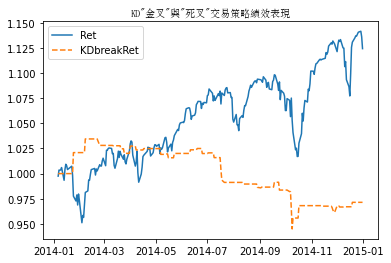

In [39]:
plt.plot(KDbreakRet.Ret,label='Ret')
plt.plot(KDbreakRet.KDbreakRet,'--',\
          label='KDbreakRet')
plt.title('KD"金叉"與"死叉"交易策略績效表現', fontproperties="SimSun")
plt.legend(loc='upper left')